In [16]:
from PIL import Image
import io
import matplotlib
import matplotlib.pyplot as plt

In [12]:
%matplotlib inline

In [3]:
import requests

In [4]:
import pandas as pd

In [51]:
df = pd.read_csv('https://raw.githubusercontent.com/conda-forge/conda-forge.github.io/master/src/core.csv', header=None, names=['GH Username', 'email', 'name'])
df = df.append(pd.read_csv('https://raw.githubusercontent.com/conda-forge/conda-forge.github.io/master/src/emeritus.csv', header=0, names=['GH Username', 'email', 'name']))

In [52]:
images = []
for i, row in df.iterrows():
    r = requests.get(f"https://avatars.githubusercontent.com/{row['GH Username']}")
    images.append(Image.open(io.BytesIO(r.content)))

In [53]:
from grid_strategy import strategies

In [57]:
gs = strategies.RectangularStrategy()
axs = gs.get_grid(len(images))

<Figure size 432x288 with 0 Axes>

In [58]:
import numpy as np

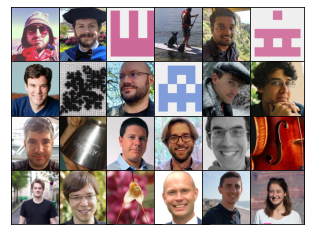

In [60]:
for img, ax in zip(images, axs):
    ax = plt.subplot(ax)
    ax.imshow(np.asarray(img))
    ax.set_xticks([])
    ax.set_yticks([])
plt.subplots_adjust(wspace=-.5, hspace=0)
plt.savefig('plots/current-core-devs.png', bbox_inches='tight', transparent=True)